In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [2]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
import pandas as pd
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

Explora brevemente los datos:

In [4]:
#repetidos, nulos, info, desc, como están distribuidos, corr, type es correcto, si requieren limp las columnas

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [6]:
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

Número de filas duplicadas: 0


<Axes: >

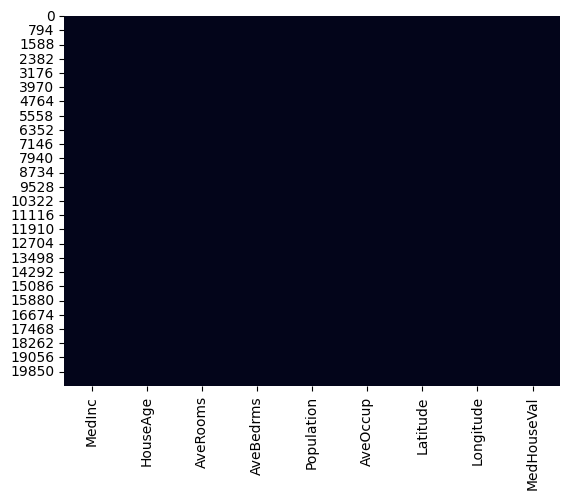

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


visualizar los datos para comprender mejor las características:

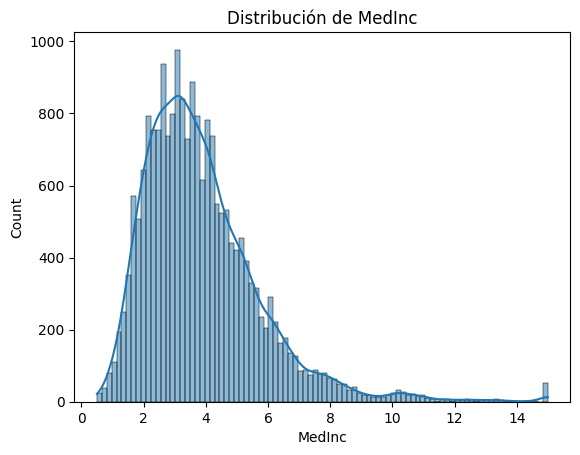

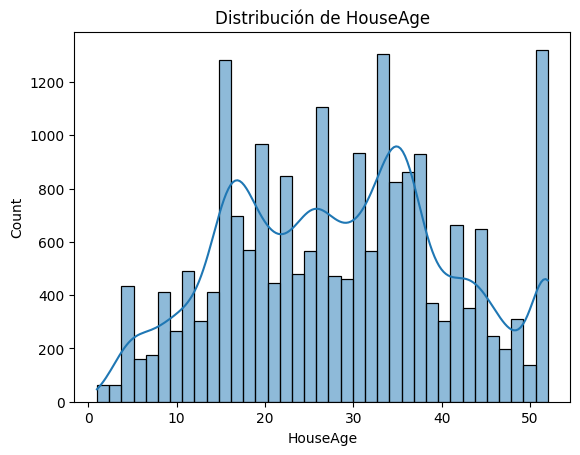

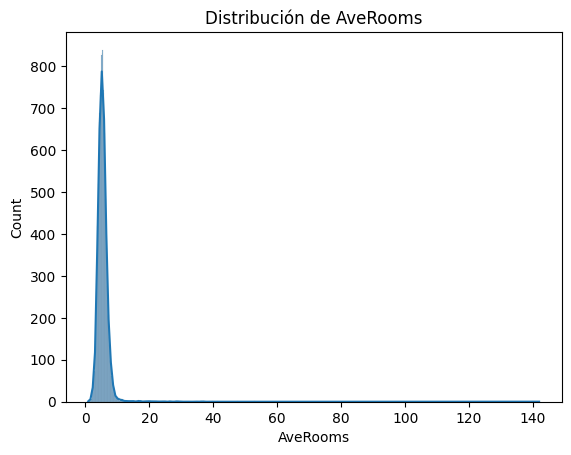

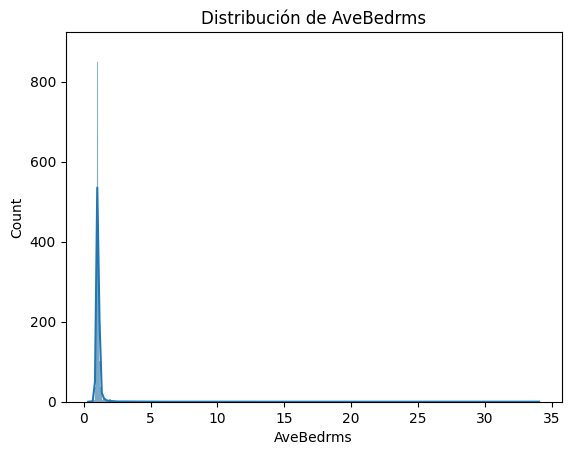

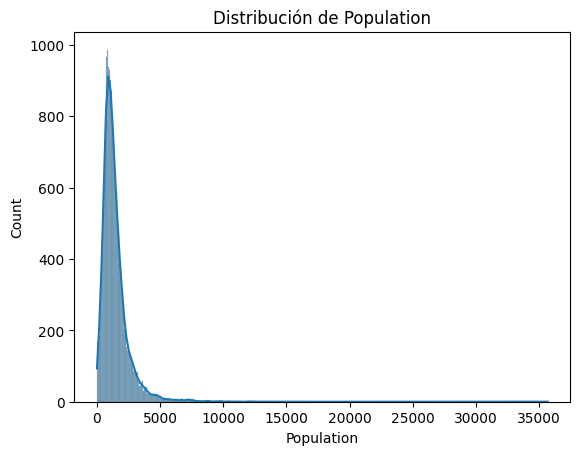

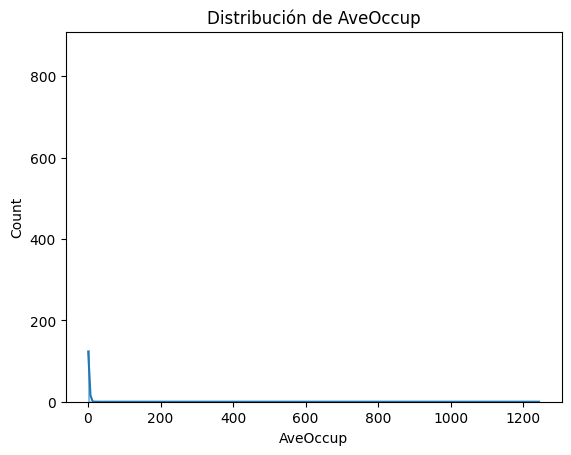

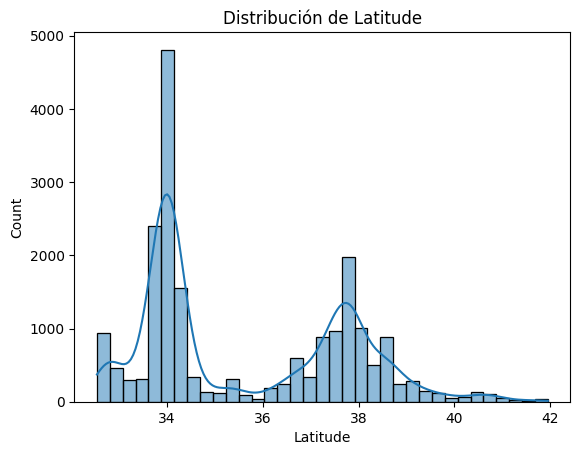

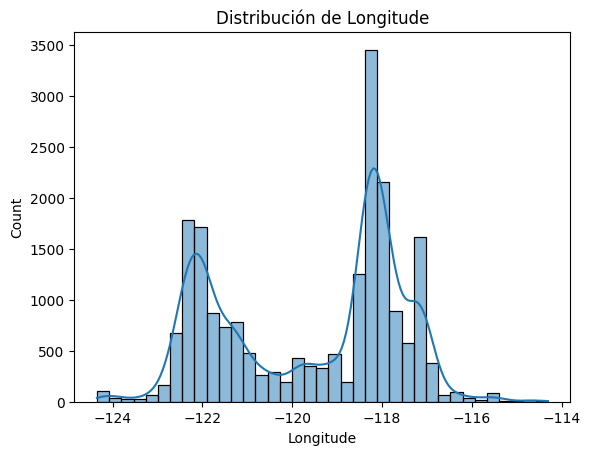

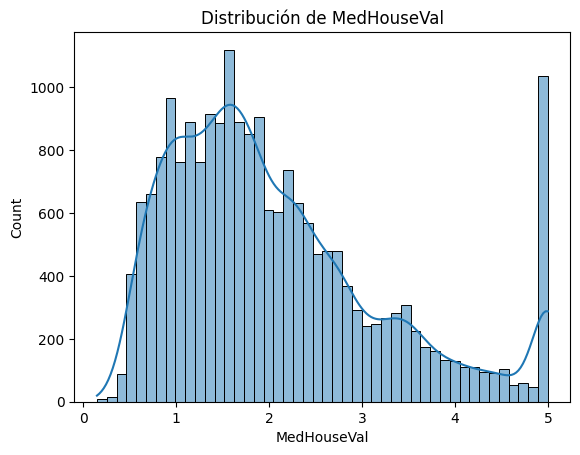

In [9]:
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()


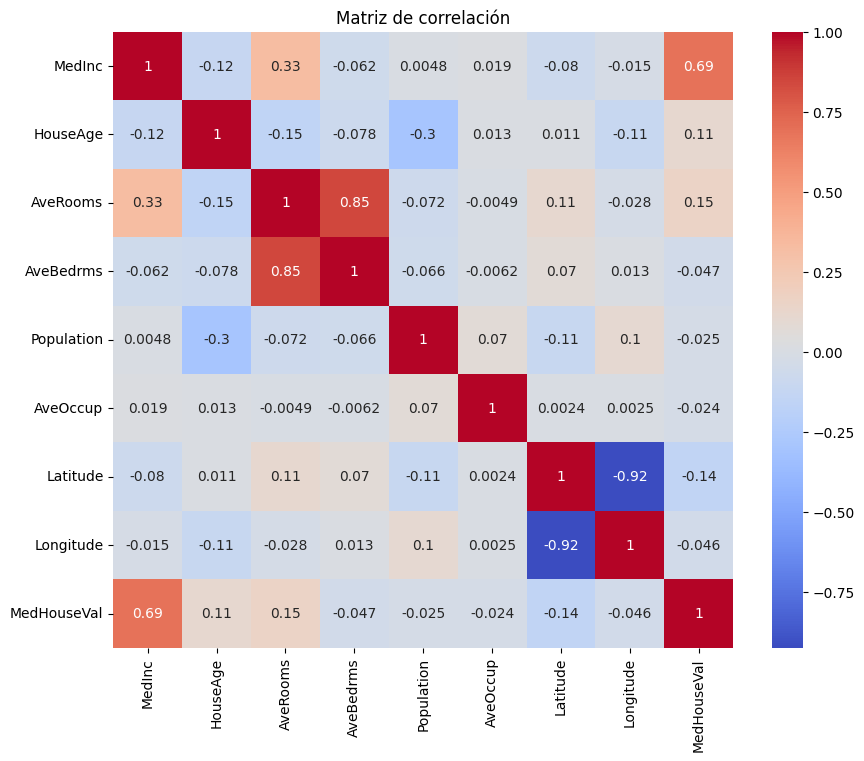

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de correlación')
plt.show()

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("IQR para cada columna:")
print(IQR)


IQR para cada columna:
MedInc           2.179850
HouseAge        19.000000
AveRooms         1.611665
AveBedrms        0.093447
Population     938.000000
AveOccup         0.852520
Latitude         3.780000
Longitude        3.790000
MedHouseVal      1.451250
dtype: float64


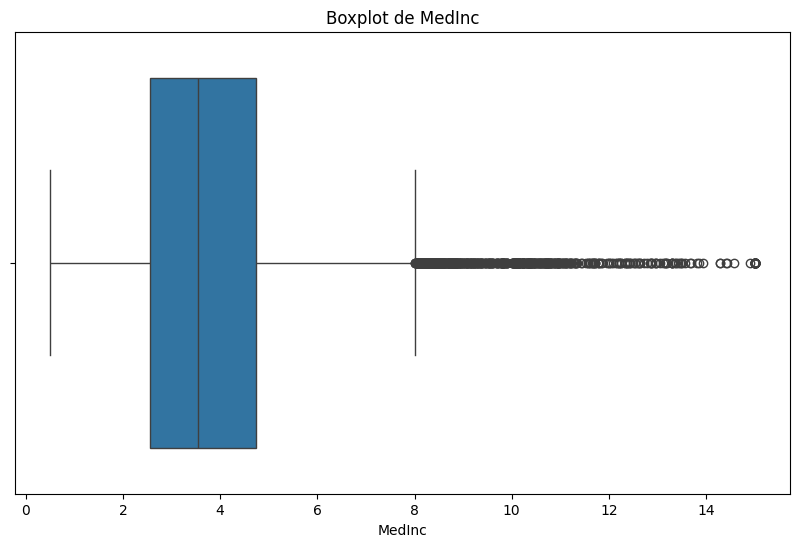

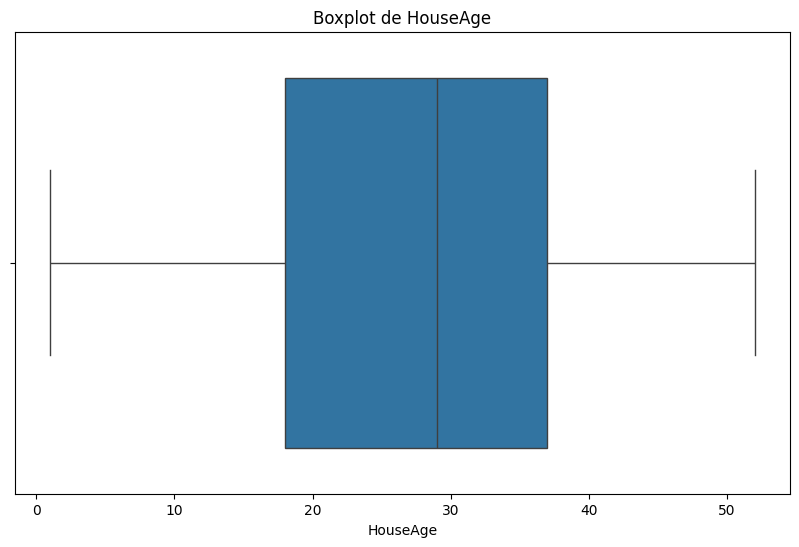

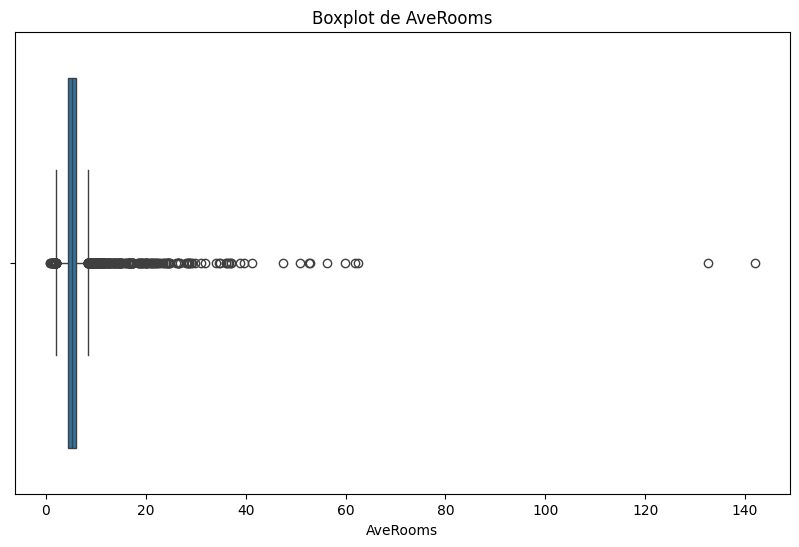

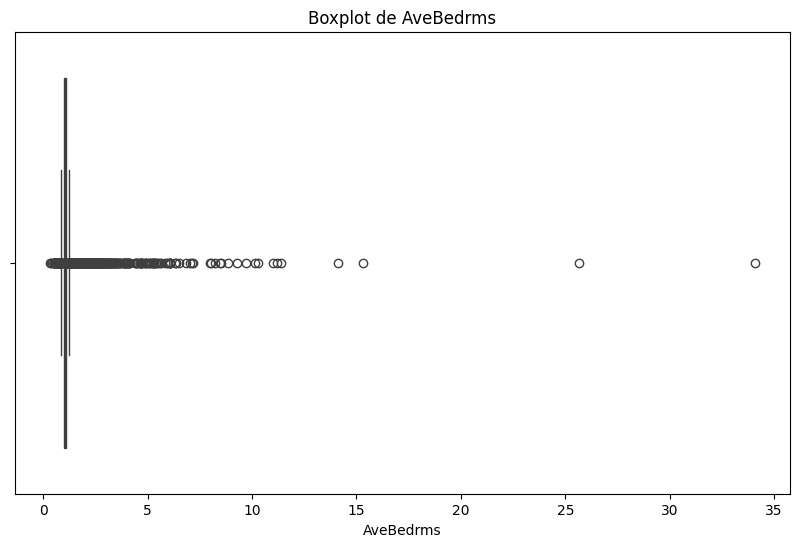

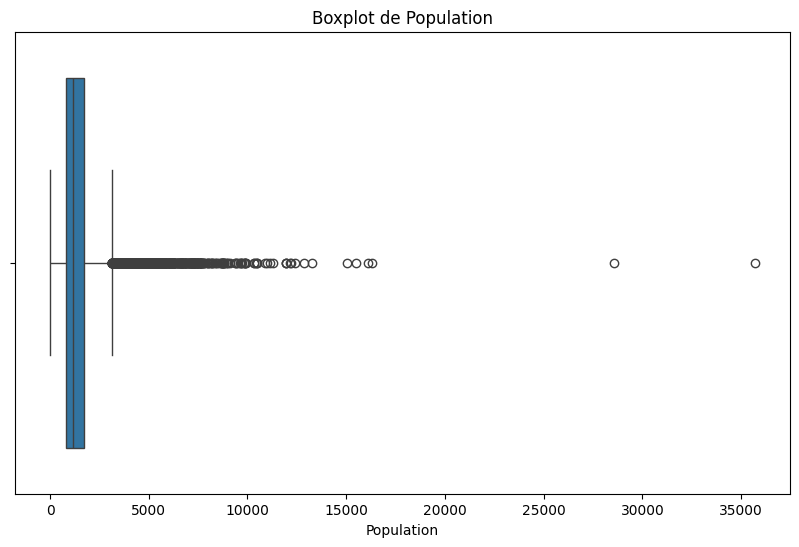

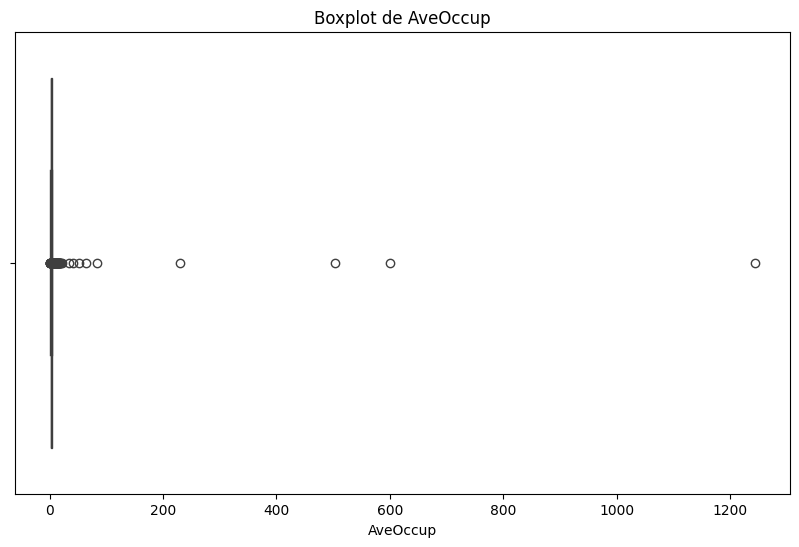

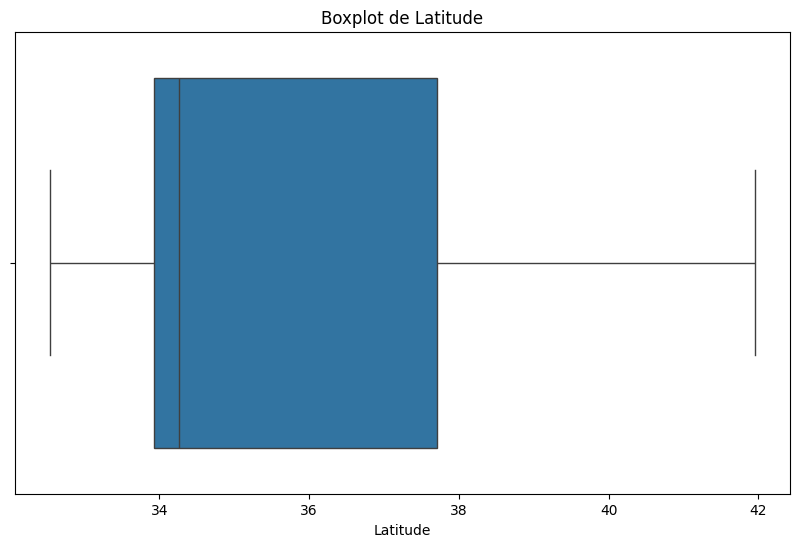

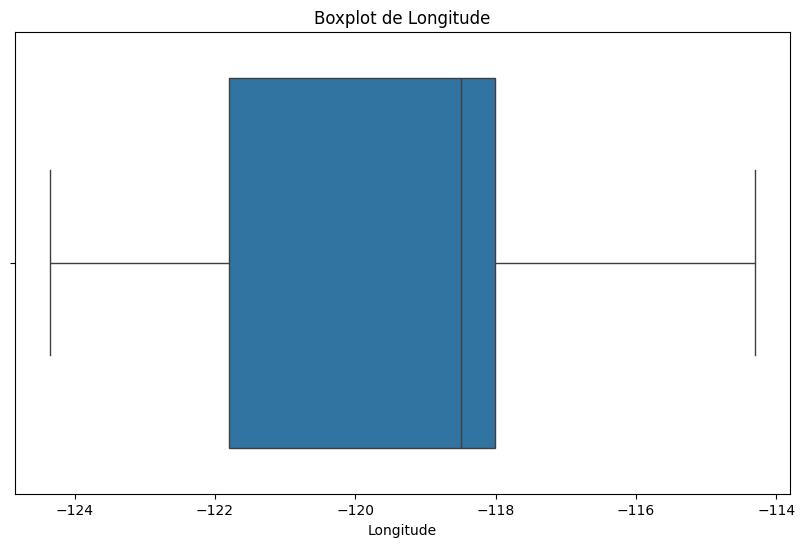

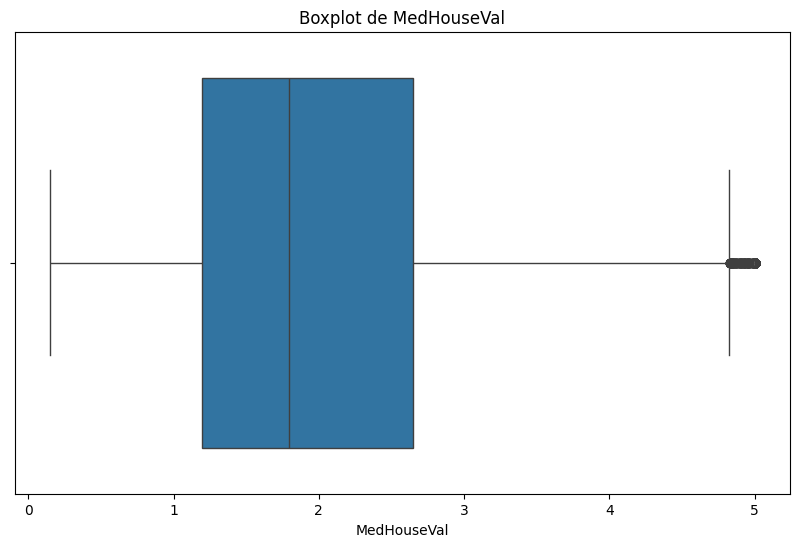

In [12]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [13]:
#opción eliminar outliers
#df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
#imputarlos
for column in df.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    
    median_value = df[column].median()
    
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)


Divide el conjunto de datos en entrenamiento y prueba:

In [15]:
from sklearn.model_selection import train_test_split

# Variables independientes (características)
X = df.drop('MedHouseVal', axis=1)

# Variable dependiente (objetivo)
y = df['MedHouseVal']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=357)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (16512, 8)
Tamaño del conjunto de prueba: (4128, 8)


Escalamos las características

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Vamos a usar una regresión lineal como modelo 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
#realizamos predicciones en el conjunt de prueba
y_pred = lin_reg.predict(X_test_scaled)

In [20]:
#valuamos
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")


Error Cuadrático Medio (MSE): 0.4382549795169672
Coeficiente de Determinación (R^2): 0.519441196616742


In [21]:
#Examinar los coeficientes
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


            Coefficient
MedInc         0.456530
HouseAge       0.054656
AveRooms       0.000601
AveBedrms      0.018500
Population     0.038016
AveOccup      -0.196248
Latitude      -0.861228
Longitude     -0.798214


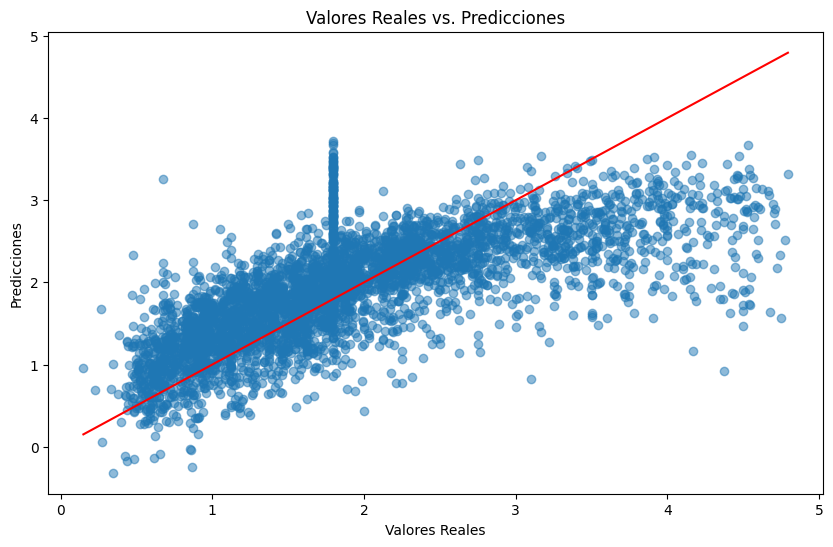

In [22]:
#graficamos datos de nuestro modelo
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [23]:
""" Los residuos son la diferencia entre los valores reales y las predicciones.
Un modelo bien ajustado debería tener residuos distribuidos aproximadamente de manera normal y centrados en cero."""

' Los residuos son la diferencia entre los valores reales y las predicciones.\nUn modelo bien ajustado debería tener residuos distribuidos aproximadamente de manera normal y centrados en cero.'

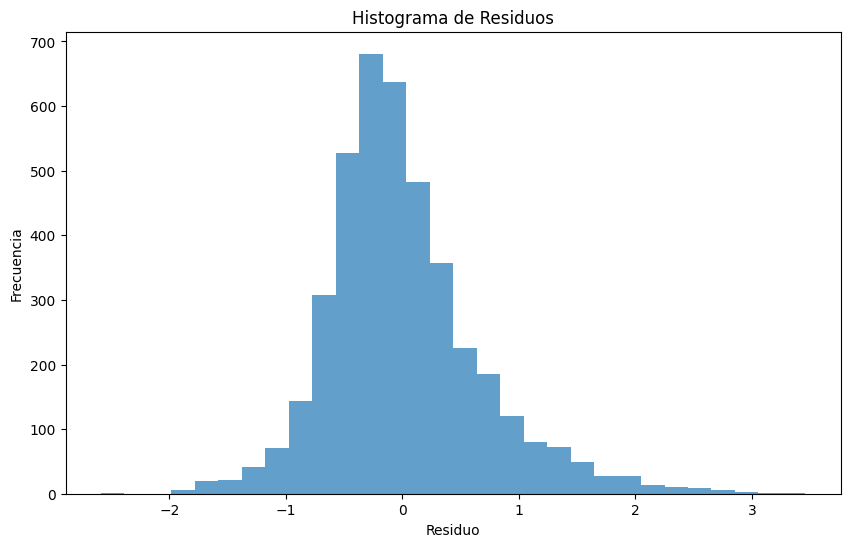

In [24]:
#histograma de residuos
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

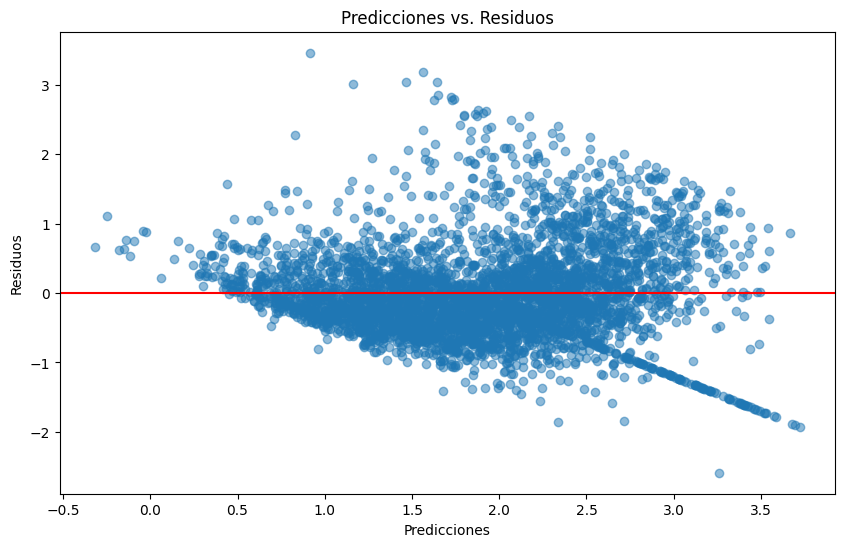

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(0, color='red')
plt.title('Predicciones vs. Residuos')
plt.show()


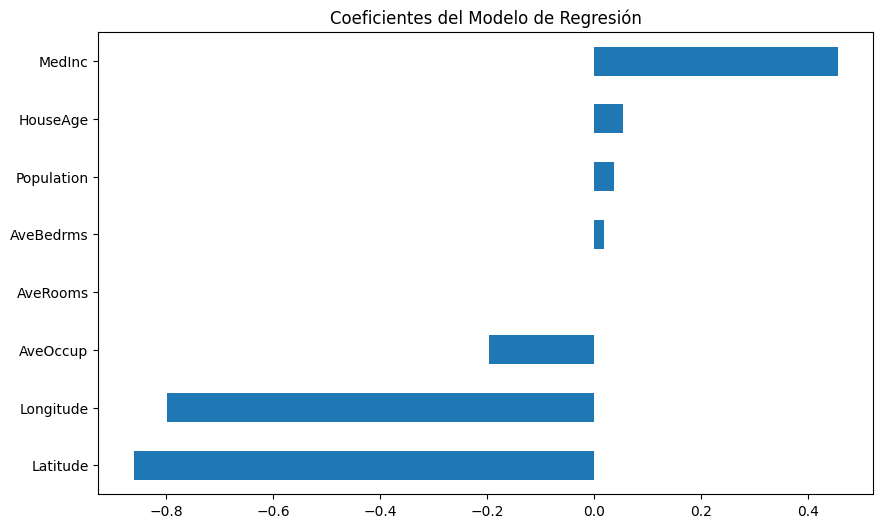

In [26]:
coeff = pd.Series(lin_reg.coef_, index=X.columns)
coeff_sorted = coeff.sort_values()

plt.figure(figsize=(10, 6))
coeff_sorted.plot(kind='barh')
plt.title('Coeficientes del Modelo de Regresión')
plt.show()
